# IPBMA_5: Projection Radiography

**Authors**: 
- Pablo García Fernández (pablo.garcia.fernandez2@rai.usc.es)
- Javier Goya Pérez (javier.goya@rai.usc.es)
- Sindy Rocío Mojica Gómez (sindyrocio.mojica@rai.usc.es)

In [753]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt
%run ./funciones.py
%run ./funciones_phantoms.py

SOURCE

In [754]:
# source(kVp, N0)
# return number of photoms (N0), efective energy (eE)

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)


250 12.0


CUBE PHANTOM

In [755]:
# OBJECT
# phantom(size, eE)
# return phantomData

size= 256
obj= cube_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_water: 3.8666
coef_soft: 4.14142


QUANTUM IMAGE. FRONTAL VIEW.

In [756]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

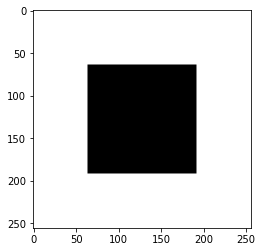

In [757]:
plt.imshow(qImage, cmap="gray")
plt.show()


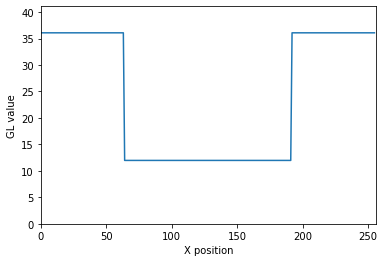

In [758]:
line = plotLineH(qImage, 128)

In [759]:
# Get number of photoms

nSI= int(N0*size*size)
print(f'Number of Photons (From the source): {nSI:d}')

nQI= int(getNumberPhotons(qImage))
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 1969957


In [760]:
# Get Distribution of the Photons per Cell
nPC= getNumberPhotonsCell(qImage, N0)
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

Number of Photons (Quantum image): 1969956


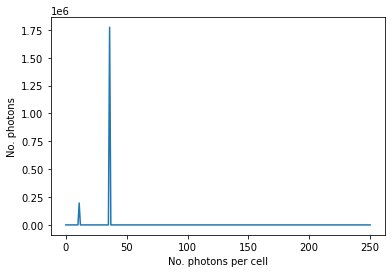

In [761]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [762]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


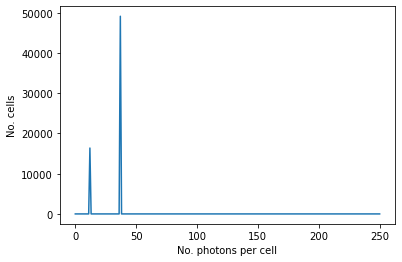

In [763]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

QUANTUM IMAGE. LATERAL VIEW

In [764]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'lateral'
qImage= interactor_PR(N0, obj, prj)

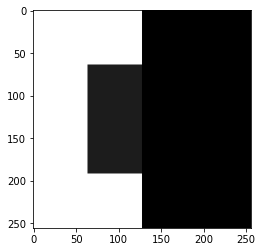

In [765]:
plt.imshow(qImage.T, cmap="gray")
plt.show()

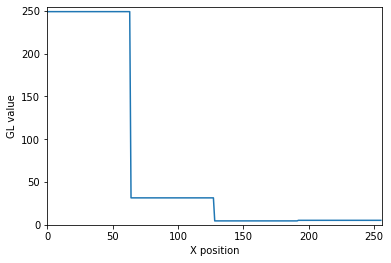

In [766]:
line = plotLineH(qImage, 128)

In [767]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= int(getNumberPhotons(qImage))
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 6540156


In [768]:
# Get Distribution of the Photons per Cell
nPC= getNumberPhotonsCell(qImage, N0)
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

Number of Photons (Quantum image): 6540155


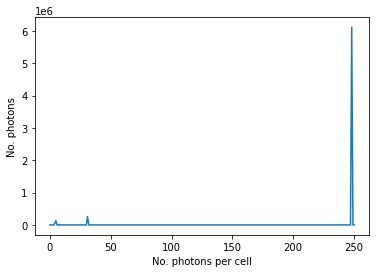

In [769]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [770]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


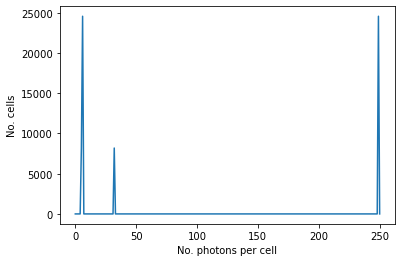

In [771]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

DETECTED IMAGE

In [772]:
# Detection
# dImage -> The detected image, under the hypothesis of Poisson distribution.

dImage= detectorNoiseP(qImage, size, size)

N Cells: 256 256


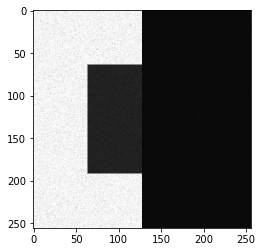

In [773]:
plt.imshow(dImage.T, cmap="gray")
plt.show()

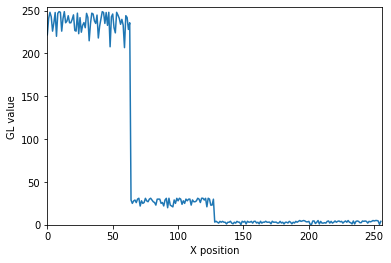

In [774]:
plotLineH(dImage, 128)

In [775]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= int(getNumberPhotons(qImage))
print(f'Number of Photons (Quantum image): {nQI:d}')

nDI= int(getNumberPhotons(dImage))
print(f'Number of Photons (Detected image): {nDI:d}')

assert nSI > nQI > nDI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 6540156
Number of Photons (Detected image): 6137232


In [776]:
# Get Distribution of the Photons per Cell

nPCD= getNumberPhotonsCell(dImage, N0)
print(f'Number of Photons (Detected image): {int(sum(nPCD[1])):d}')

Number of Photons (Detected image): 3072685


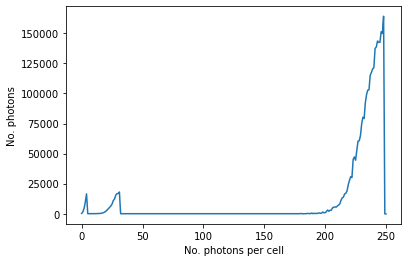

In [777]:
plotDistribution(nPCD, 'No. photons per cell', 'No. photons')

In [778]:
# Get Distribution of cells per Photons

nCPD= getNumberCellsPhoton(dImage, N0)
print(f'Number of Cells (Detected image): {int(sum(nCPD[1])):d}')

Number of Cells (Detected image): 65897


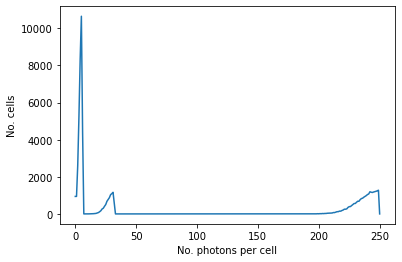

In [779]:
plotDistribution(nCPD, 'No. photons per cell', 'No. cells')

EXPERIMENTS

Experiment 1. Baseline.

In [780]:
# Source Data 1

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)

250 12.0


In [781]:
# OBJECT

size= 256
obj= cube_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_water: 3.8666
coef_soft: 4.14142


In [782]:
# Interaction

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

In [783]:
# Detection

dImage= detectorNoiseP(qImage, size, size)

N Cells: 256 256


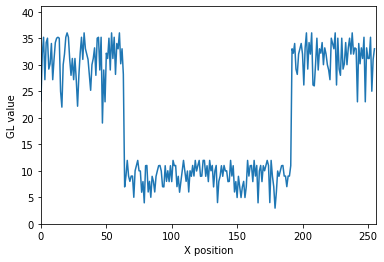

In [784]:
plotLineH(dImage, 128)

In [785]:
# Contrast 1
w= 10
cnt_1= getContrast(dImage, 25, 128, 125, 128, w)

# SNR 1
snr_1= getSNR(dImage, 125, 128, w)

print(f'Constrast 1: {cnt_1: .3f}, SNR 1: {snr_1: .3f}')

Constrast 1:  0.716, SNR 1:  3.080


Experiment 2. Image Contrast.

In [786]:
# Source Data 2

kVp= 130
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)

250 52.0


In [787]:
# OBJECT

size= 256
obj= cube_phantom(size, eE)

coef_air: 0.00024566000000000003
coef_water: 0.22269999999999998
coef_soft: 0.2354048


In [788]:
# Interaction

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

In [789]:
# Detection

dImage= detectorNoiseP(qImage, size, size)

N Cells: 256 256


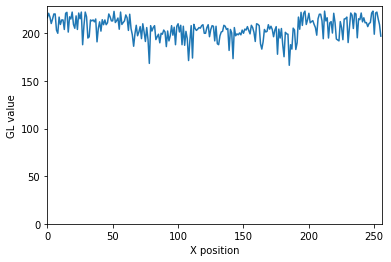

In [790]:
plotLineH(dImage, 128)

In [791]:
# Contrast 2
w= 10
cnt_2= getContrast(dImage, 25, 128, 125, 128, w)

# SNR 2
snr_2= getSNR(dImage, 125, 128, w)

print(f'Constrast 2: {cnt_2: .3f}, SNR 2: {snr_2: .3f}')

Constrast 2:  0.072, SNR 2:  14.133


Experiment 3. Noise.

In [792]:
# Source Data 3

kVp= 30
I0= 2500  
N0, eE= source(kVp, I0)

print(N0, eE)

2500 12.0


In [793]:
# OBJECT

size= 256
obj= cube_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_water: 3.8666
coef_soft: 4.14142


In [794]:
# Interaction

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

In [795]:
# Detection

dImage= detectorNoiseP(qImage, size, size)

N Cells: 256 256


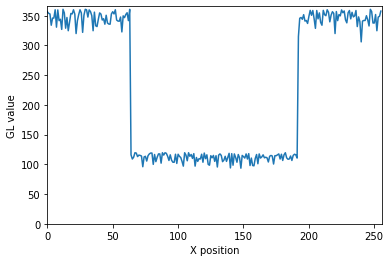

In [796]:
plotLineH(dImage, 128)

In [802]:
# Contrast 3
w= 10
cnt_3= getContrast(dImage, 25, 128, 125, 128, w)

# SNR 3
snr_3= getSNR(dImage, 125, 128, w)

print(f'Constrast 3: {cnt_3: .3f}, SNR 3: {snr_3: .3f}')

[[109.53828583 100.53828583 109.         112.53828583 118.
  112.53828583 119.53828583  88.53828583 110.         110.
  105.         118.53828583 119.53828583 107.53828583 107.53828583
  112.         112.53828583  93.53828583 104.         118.53828583]
 [112.         103.         101.         109.53828583 117.
  108.         108.         109.         117.53828583 106.
  109.53828583 104.53828583 117.53828583 116.53828583 103.
  110.         119.         112.53828583 115.         116.        ]
 [119.53828583 112.         119.         114.53828583 111.53828583
  115.53828583 114.53828583 117.          96.         115.
  109.         100.         113.53828583 105.53828583 102.
  106.53828583 114.         113.         116.53828583 118.        ]
 [106.53828583 117.         119.53828583 116.53828583 119.53828583
   99.         116.         119.         110.53828583 106.
  117.         111.53828583 116.         110.         112.53828583
  114.53828583 118.         115.         111.         10

RESULTS

In [798]:
print(f'Constrast 1: {cnt_1: .3f}, SNR 1: {snr_1: .3f}')
print(f'Constrast 2: {cnt_2: .3f}, SNR 2: {snr_2: .3f}')
print(f'Constrast 3: {cnt_3: .3f}, SNR 3: {snr_3: .3f}')

Constrast 1:  0.716, SNR 1:  3.080
Constrast 2:  0.072, SNR 2:  14.133
Constrast 3:  0.610, SNR 3:  10.515


In [799]:
assert cnt_1 > cnt_2, "Something wrong happens"
assert snr_1 < snr_2 and snr_1 < snr_3, "Something wrong happens"